### Label Data

Modified Erik's script to visualize an entire lot (for context while manually labeling).  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, json
from matplotlib import colors
from datetime import datetime as dt
from IPython.display import clear_output
%matplotlib inline

import cv2

# !pip install pickle5 > /dev/null
# import pickle5 as pickle

# def read_pickle(path):
#     with open(path, "rb") as fh:
#         df = pickle.load(fh)
#     return df


# Dictionary of XKCD color map
cm_xkcd = colors.XKCD_COLORS.copy()
# make a color map of fixed colors - blue passing die, fuchsia failing die
cmap = colors.ListedColormap([cm_xkcd['xkcd:white'], cm_xkcd['xkcd:azure'], cm_xkcd['xkcd:fuchsia']])

df = pd.read_pickle('WM_unlabeled.pkl')

# remove corrupt imgs
df['zero_count'] = df.WM.apply(lambda x: np.count_nonzero(x==0))
df = df[df['zero_count'] < 730].copy()

n = 600
ranges = list(zip([i*n+1 if i else i for i in range(5)],[i*n for i in range(1,6)]))
users = ['daniel', 'erik', 'lea', 'naga', 'scott']

In [3]:
# enter your name like you see it above
user = 'daniel'

user_n = users.index(user)
rng = ranges[user_n]

# print index for users to label
print(f'index range:\t{rng}')

test_lots = df.iloc[rng[0]:rng[1]].lotName.unique().tolist()
user_prompt = "0: 'none', 1: 'Edge-Ring', 2: 'Edge-Loc', 3: 'Center',\n4: 'Loc', 5: 'Scratch', 6: 'Random', 7: 'Donut', 8: 'Near-full'\n9: CORRUPT DATA\n"
user_labels = {i:[] for i in test_lots}

# display first 5 lots to be labeled
test_lots

index range:	(0, 600)


['lot2006',
 'lot2036',
 'lot2201',
 'lot2250',
 'lot2880',
 'lot2902',
 'lot2910',
 'lot2928',
 'lot2954',
 'lot2982',
 'lot3005',
 'lot3106',
 'lot3157',
 'lot3270',
 'lot3275',
 'lot3291',
 'lot3516',
 'lot3524',
 'lot3539',
 'lot3561',
 'lot3671',
 'lot3739',
 'lot3819',
 'lot3823',
 'lot3968']

In [4]:
len(test_lots)

25

lot3968


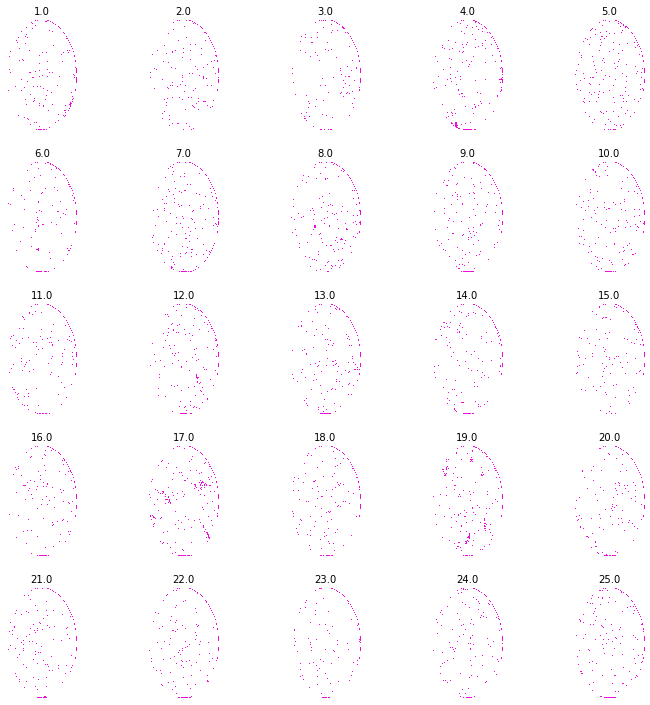

In [ ]:
for lot in test_lots:
    
    # select lot from df
    lot_df = df[df.lotName == lot]  
    print(f'{lot}')
    

    fig, axs = plt.subplots(5, 5, figsize=[10,10])
    fig.tight_layout()

    # Nested for loops to loop through all digits and number of examples input for plotting
    for n_row in range(min(25, lot_df.shape[0])):
        #img = lot_df.WM.iloc[n_row]
        #ret, thresh_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
        img = lot_df.waferMap.iloc[n_row]
        ret, thresh_img = cv2.threshold(img, 1, 1, cv2.THRESH_BINARY)
        index = lot_df.waferIndex.iloc[n_row]

        # imshow to plot image in axs i,j location in plot
        j = n_row % 5
        i = int(n_row/5)
        axs[i, j].imshow(thresh_img,
                         interpolation='none',
                         cmap=cmap)
        axs[i, j].axis('off')

        # label the figure with the index# and defect classification [for future reference]
        axs[i, j].set_title(f'{index}', fontsize=10)
        
    plt.show()
    
    input('Press enter to see next lot')
    
    clear_output(wait=True)
    

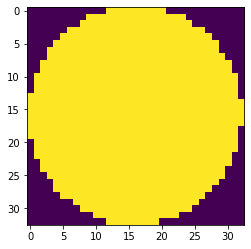

In [22]:
lot_df = df[df.lotName == 'lot5462']
x = lot_df.waferMap.iloc[1]
plt.imshow(x)

In [23]:
np.unique(x)

array([0, 1], dtype=uint8)

In [24]:
df.head()

,waferMap,dieSize,lotName,waferIndex,failureType,encoding,WM,zero_count
11669,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2973.0,lot2006,4.0,[],0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",683
11670,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3003.0,lot2006,5.0,[],0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",674
11671,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3003.0,lot2006,6.0,[],0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",666
11672,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3007.0,lot2006,7.0,[],0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",669
11673,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2995.0,lot2006,8.0,[],0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",664
